## Example: T-gate

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

from qiskit.visualization import plot_histogram

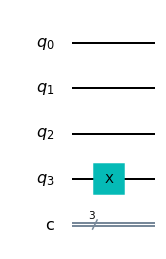

In [2]:
qpe = QuantumCircuit(4, 3)
qpe.x(3)
qpe.draw('mpl')

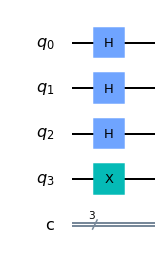

In [3]:
for qubit in range(3):
    qpe.h(qubit)
qpe.draw('mpl')

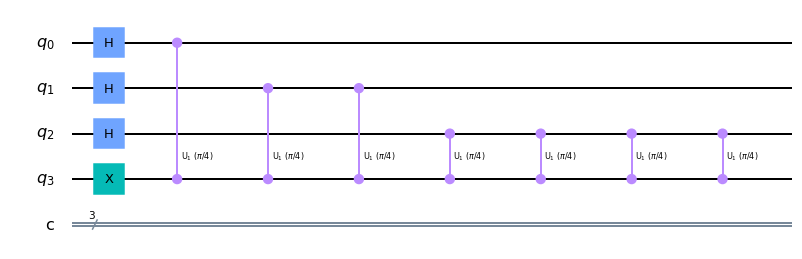

In [4]:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cu1(math.pi/4, counting_qubit, 3)
    repetitions *= 2
qpe.draw('mpl')

In [5]:
def qft_dagger(circ, n):
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circ.cu1(-math.pi/float(2**(j-m)), m, j)
        circ.h(j)

In [7]:
qpe.barrier()
qft_dagger(qpe, 3)

qpe.barrier()
for n in range(3):
    qpe.measure(n,n)

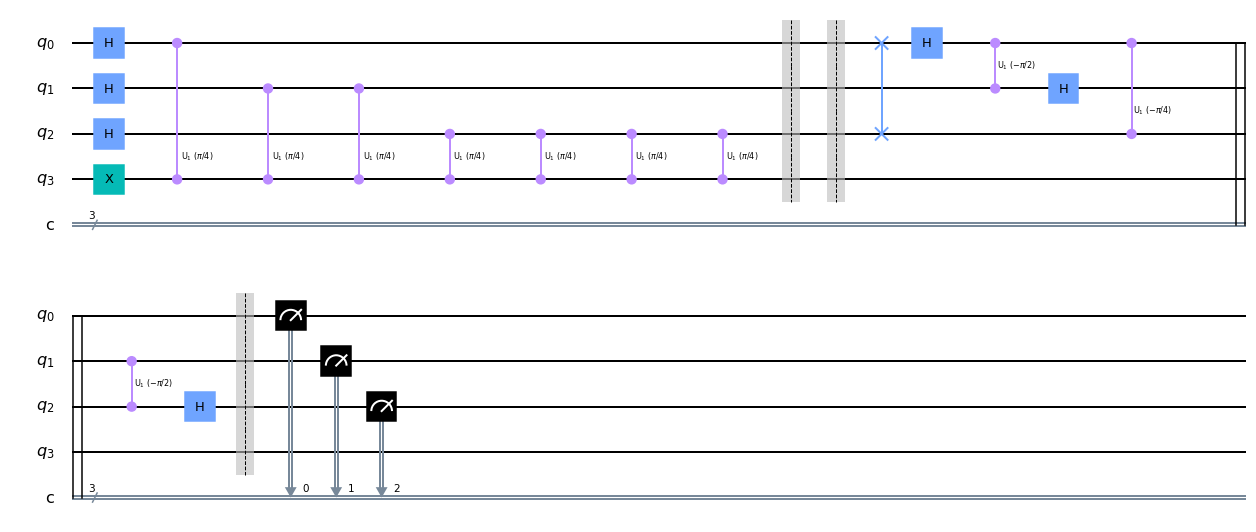

In [8]:
qpe.draw('mpl')

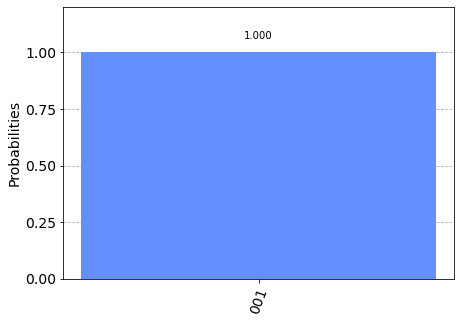

In [9]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

## Getting More Precision

### (1) Problem

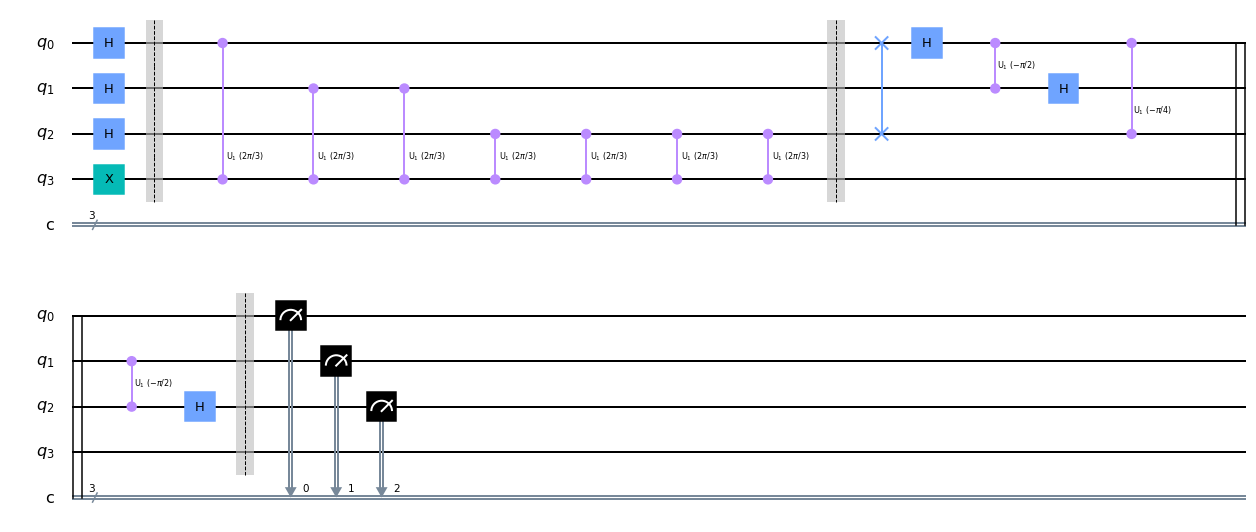

In [11]:
qpe2 = QuantumCircuit(4, 3)

for qubit in range(3):
    qpe2.h(qubit)
    
qpe2.x(3)
qpe2.barrier()

angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cu1(angle, counting_qubit, 3)
    repetitions *= 2
qpe2.barrier()
    
qft_dagger(qpe2, 3)
qpe2.barrier()

for n in range(3):
    qpe2.measure(n,n)

qpe2.draw('mpl')

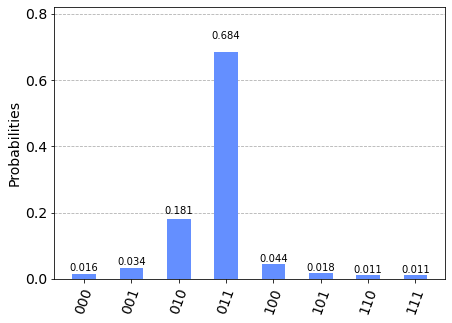

In [14]:
backend = Aer.get_backend('qasm_simulator')
shots = 4096
results = execute(qpe2, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

### (2) Solution

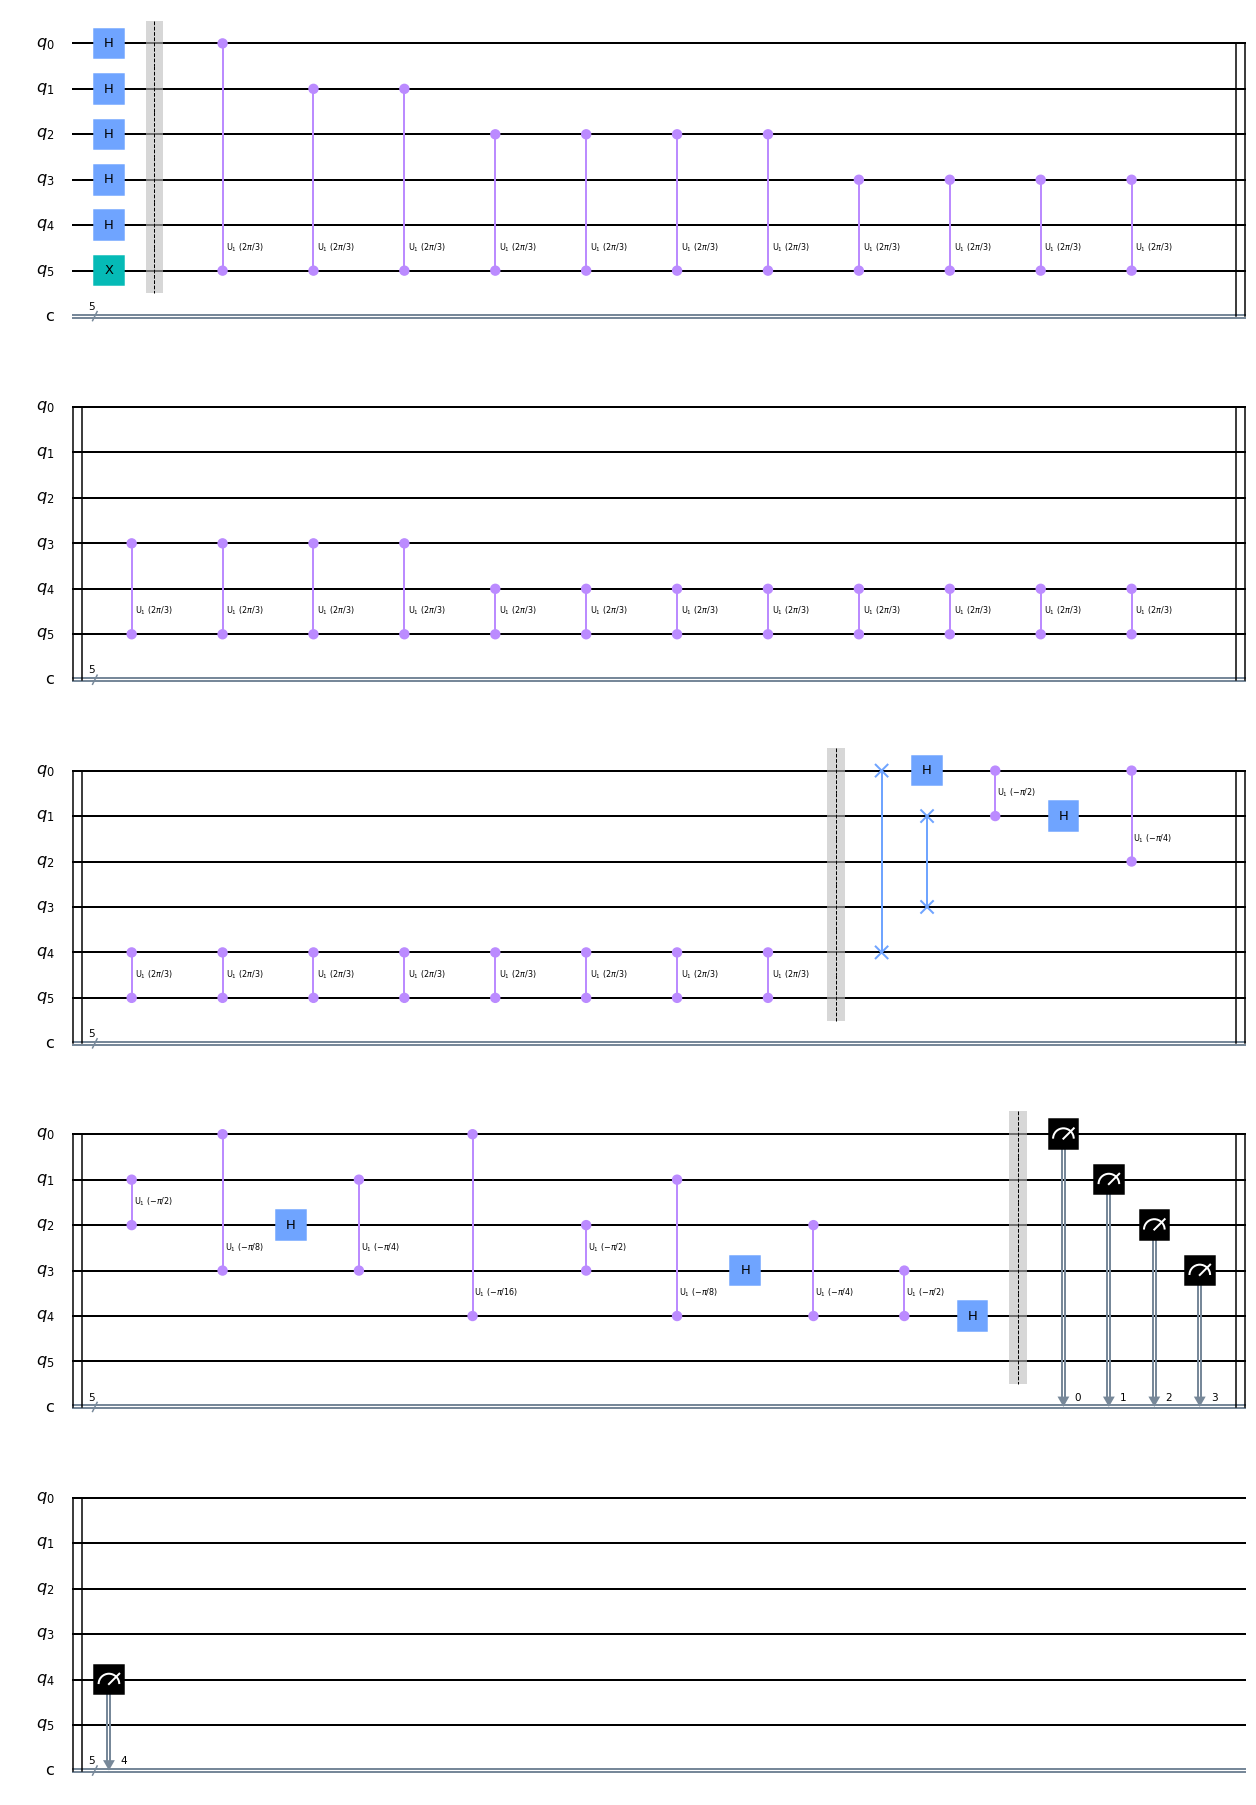

In [15]:
qpe3 = QuantumCircuit(6, 5)

for qubit in range(5):
    qpe3.h(qubit)

qpe3.x(5)
qpe3.barrier()

angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cu1(angle, counting_qubit, 5)
    repetitions *= 2
qpe3.barrier()

qft_dagger(qpe3, 5)
qpe3.barrier()

for n in range(5):
    qpe3.measure(n,n)

qpe3.draw('mpl')

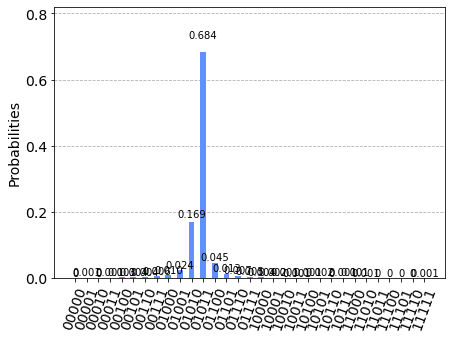

In [16]:
backend = Aer.get_backend('qasm_simulator')
shots = 4096
results = execute(qpe3, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

## Running on a Real Device

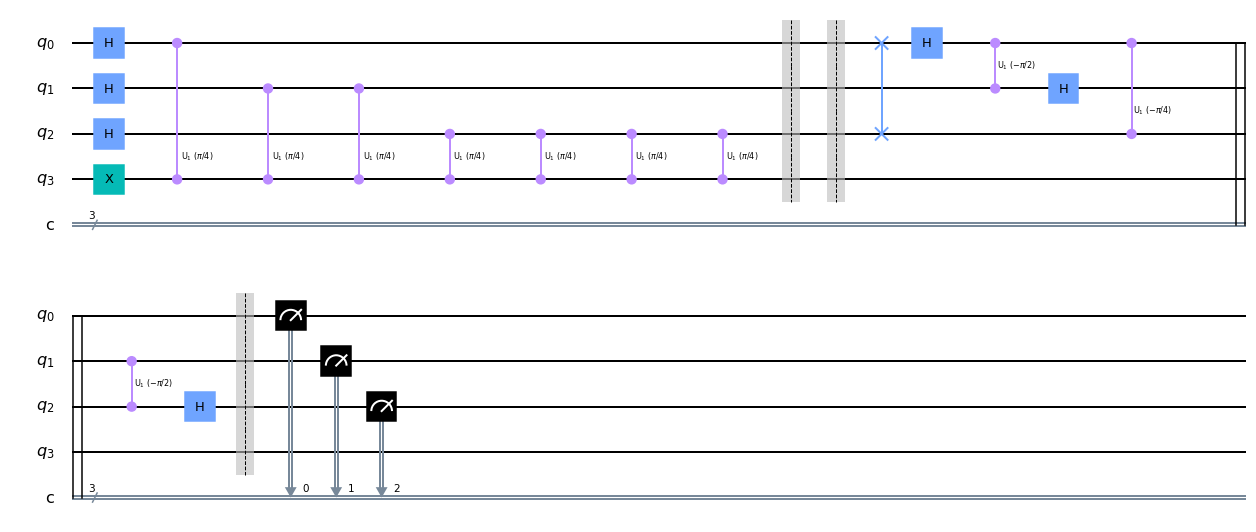

In [17]:
qpe.draw('mpl')

In [18]:
from qiskit.providers.ibmq import least_busy

nqubits = 4

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqubits
                                      and not x.configuration().simulator
                                      and x.status().operational==True))
print("least busy backend: ", backend)

from qiskit.tools.monitor import job_monitor
shots = 2048
job = execute(qpe, backend=backend, shots=shots, optimization_level=3)
job_monitor(job)

C:\Users\hostaf\anaconda3\envs\qiskit\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


least busy backend:  ibmq_ourense
Job Status: job has successfully run


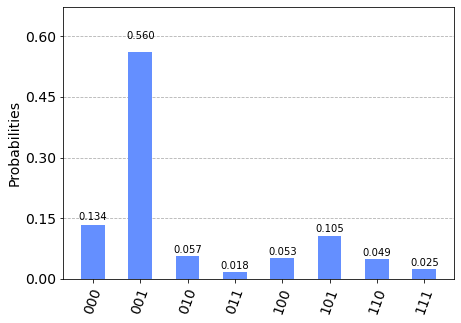

In [19]:
results = job.result()
answer = results.get_counts(qpe)

plot_histogram(answer)